In [ ]:
import pandas as pd
#import  glob os glb
#from glob import glb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [ ]:
csv_file_name = "Walmart_train.csv"

In [ ]:
df = pd.read_csv('Walmart_train.csv')
df.head(5)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


Here, we are predicting weekly sales of walmart. So our target column is Weekly_Sales

In [ ]:
df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [ ]:
target_column_name = "Weekly_Sales"

In [ ]:
#categorical_target_column = True
categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 421570
Total Number of Columns : 5


This bar chart will display each department as a bar, and the height of each bar represents the total weekly sales for that department. The departments are sorted in descending order based on their total weekly sales, helping you identify which departments contribute the most to weekly sales.

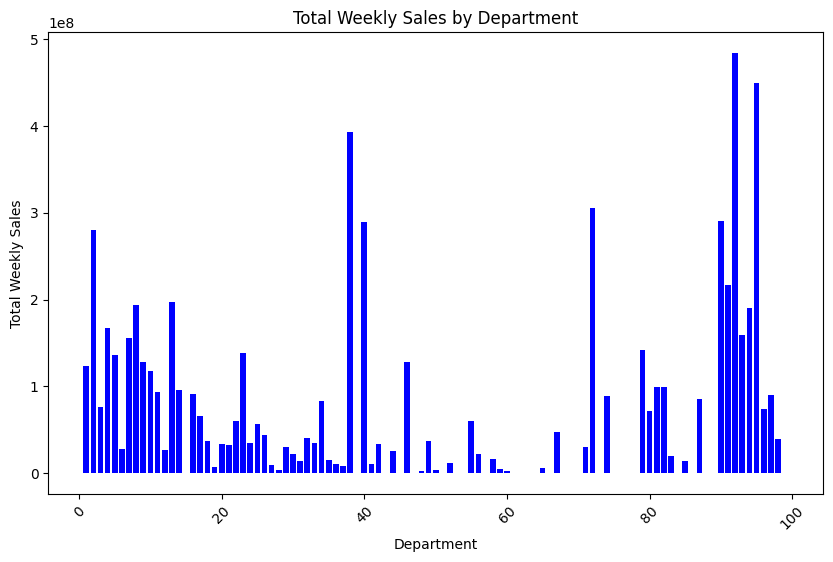

In [ ]:
department_sales = df.groupby('Dept')['Weekly_Sales'].sum().reset_index()

# Sort the data by total weekly sales in descending order to highlight top contributors
department_sales = department_sales.sort_values(by='Weekly_Sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(department_sales['Dept'], department_sales['Weekly_Sales'], color='blue')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Department')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

This bar chart will display each store as a bar, and the height of each bar represents the total weekly sales for that store. The stores are sorted in descending order based on their total weekly sales, making it easy to identify which store contributes the most.

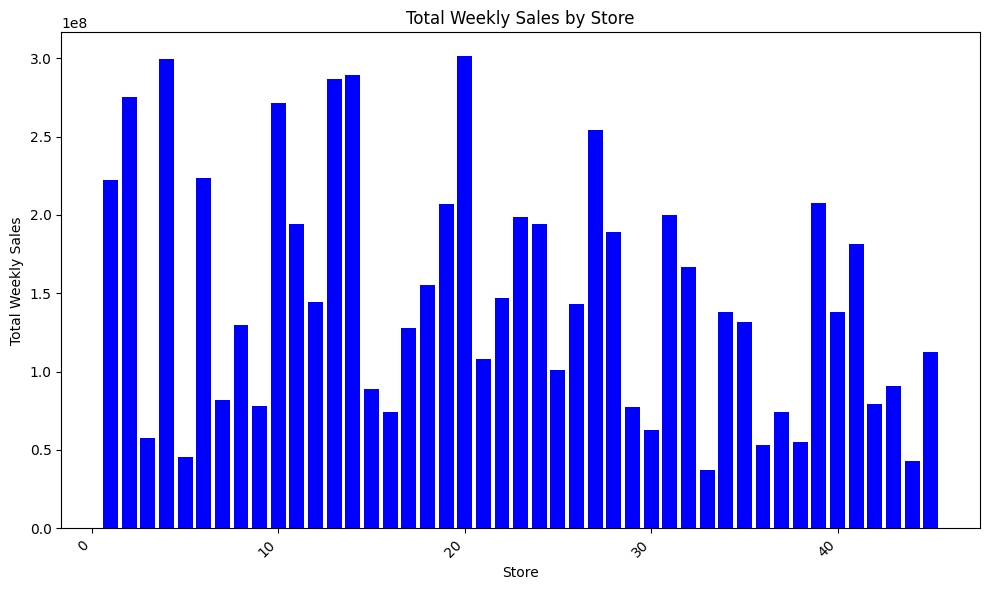

In [ ]:
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the data by total weekly sales in descending order
total_sales_by_store = total_sales_by_store.sort_values(by='Weekly_Sales', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_sales_by_store['Store'], total_sales_by_store['Weekly_Sales'], color='blue')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Store')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

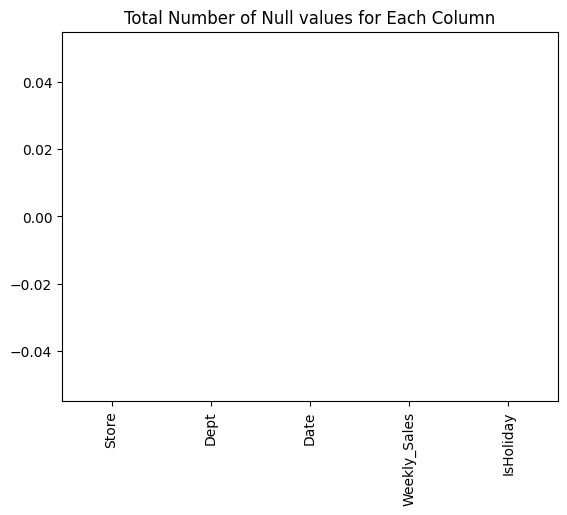

In [ ]:

df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64

In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print(( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


In [ ]:
df.drop("Date",axis=1 , inplace = True)

In [ ]:
categorical_columns = ["IsHoliday","Store","Dept"]
numeric_columns = ["Weekly_Sales"]


In [ ]:
df

,Store,Dept,Weekly_Sales,IsHoliday
0,1,1,24924.50,False
1,1,1,46039.49,True
2,1,1,41595.55,False
3,1,1,19403.54,False
4,1,1,21827.90,False
...,...,...,...,...
421565,45,98,508.37,False
421566,45,98,628.10,False
421567,45,98,1061.02,False
421568,45,98,760.01,False


As the dataset has 421570 rows so we take a small set of data from here. Here we choose 5000 datas for our Linear Regression model and SVR

In [ ]:
X = df.iloc[:5000].drop(['Weekly_Sales'], axis = 1)

y = df.iloc[:5000]['Weekly_Sales']


In [ ]:
enc  = LabelEncoder()
X["IsHoliday"] = enc.fit_transform( X["IsHoliday"]  )
X["IsHoliday"]

0       0
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: IsHoliday, Length: 5000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train

,Store,Dept,IsHoliday
4227,1,31,0
4676,1,34,0
800,1,6,0
3671,1,27,0
4193,1,31,0
...,...,...,...
4426,1,33,0
466,1,4,0
3092,1,23,0
3772,1,28,0


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Here the trained Linear Regression model is then used to make predictions on the test set (X_test). The predicted values are stored in the variable y_pred.

In [ ]:
# Predicting the values of the Test Set

y_pred = regressor.predict(X_test)
print(y_pred)

Here, prints the estimated coefficients and the intercept
for the linear regression model.

The coefficients and intercept collectively define the linear regression model and how it relates the independent variables to the dependent variable. Their values are optimized during the training process to minimize the difference between predicted and actual values, resulting in a model that accurately represents the relationships in the dataset. The combination of these elements contributes to the overall fit of the model to the data.


If coefficient is negative  it suggests that the predicted weekly sales tends to decrease.

In [ ]:

# Estimated coefficients and intercept for the linear regression

print(regressor.coef_)

print(regressor.intercept_)

[-1.56038229e+02  1.11306622e+02  5.76413247e-01  1.08496252e+03]
14399.964553417594


The mean square error quantifies the average squared difference between the actual (observed) values and the predicted values produced by the model.

The error is too high here. so the model is not performing well

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


106611214.08642454

Here support vercor regression is trained and mean_squared_error is used to calculate the mean squared error, which is used to evaluate the performance of the regression model.

This value is also very high. So, it is also not performing well

In [ ]:
from sklearn.svm import SVR
regr  =  SVR()
regr.fit( X_train , y_train)
y_pred =  regr.predict( X_test )
print(mean_squared_error(y_test, y_pred))


208189508.25994882
